In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,iqr
from statsmodels import robust

In [206]:
df = pd.read_csv('IMU_Mega.csv')

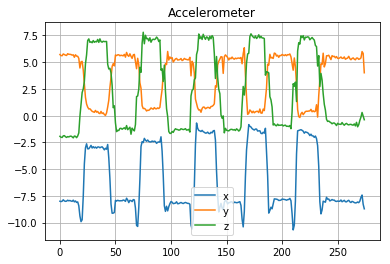

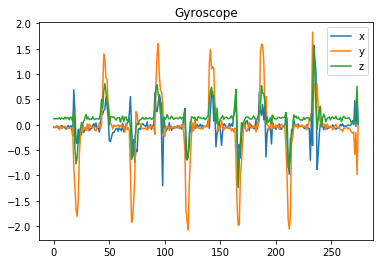

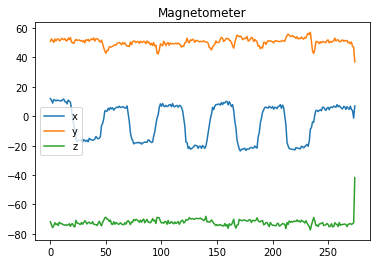

In [207]:
fromRow = 0
toRow = 275
#accelerometer
x = df.iloc[fromRow:toRow,1]
y = df.iloc[fromRow:toRow,2]
z = df.iloc[fromRow:toRow,3]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.grid()

plt.legend()
plt.title("Accelerometer")
plt.show()
#gyroscope
x = df.iloc[fromRow:toRow,4]
y = df.iloc[fromRow:toRow,5]
z = df.iloc[fromRow:toRow,6]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Gyroscope")
plt.show()
#Magnetometer
x = df.iloc[fromRow:toRow,7]
y = df.iloc[fromRow:toRow,8]
z = df.iloc[fromRow:toRow,9]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Magnetometer")
plt.show()


In [208]:
df.iloc[1][1]

-8.030562

In [209]:
nintyDegree = []
zeroDegree = []
movement = []
for i in range(0,275):
    if df.iloc[i][3]<=7.5 and df.iloc[i][3]>=6:
        nintyDegree.append(i)
    elif df.iloc[i][3]<=0 and df.iloc[i][3]>=-2:
        zeroDegree.append(i)
    elif df.iloc[i][3]<6 and df.iloc[i][3]>-2:
        movement.append(i)

## Ninty Degree window

In [210]:
x=len(nintyDegree)
indexNinty = [0]
for i in range(0,x-1):
    if(nintyDegree[i+1]-nintyDegree[i])>3:
        indexNinty.append(i)
        indexNinty.append(i+1)
indexNinty.append(x-1)
indexNinty

[0, 17, 18, 32, 33, 45, 46, 57, 58, 75]

In [211]:
matrixNinty = df.iloc[nintyDegree[indexNinty[2]]:nintyDegree[indexNinty[3]],1:10]
matrixNinty

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
74,-2.423056,0.933786,6.785513,-0.496479,0.257215,-0.068679,-16.415973,50.691082,-72.084320
75,-2.518829,0.665622,7.800706,-0.530036,0.207147,0.025332,-18.761112,51.232265,-70.164405
76,-2.121371,0.679988,6.723261,-0.094602,-0.000317,0.008554,-18.219924,51.051872,-71.037094
77,-2.288974,0.603370,7.518177,-0.066905,0.027380,0.085254,-18.039529,50.149894,-70.164405
78,-2.389535,0.440556,7.192548,-0.097798,0.010869,0.096972,-18.039529,50.871475,-70.513481
79,-2.274607,0.512385,7.221280,0.001007,-0.059973,0.115615,-17.678739,50.871475,-71.211631
80,-2.408690,0.498019,6.991425,0.024443,-0.080479,0.143046,-18.219924,49.608707,-72.084320
81,-2.446999,0.589004,7.283533,-0.004320,-0.069294,0.116947,-17.859134,51.051872,-70.688018
82,-2.451787,0.723086,6.866920,-0.024294,-0.079947,0.108691,-18.941507,50.330291,-72.084320
83,-2.370380,0.651256,7.087198,-0.030419,-0.059440,0.144910,-18.219924,50.330291,-70.688018


## Zero degree Window

In [212]:
y=len(zeroDegree)
indexZero = [0]
for i in range(0,y-1):
    if(zeroDegree[i+1]-zeroDegree[i])>3:
        indexZero.append(i)
        indexZero.append(i+1)
indexZero

[0, 13, 14, 32, 33, 53, 54, 71, 72, 88, 89]

In [213]:
matrixZero = df.iloc[zeroDegree[indexZero[4]]:zeroDegree[indexZero[5]],1:10]
matrixZero

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
97,-8.897307,6.004964,-0.090984,-0.217642,0.639384,0.426677,0.901976,42.392898,-68.942634
98,-8.504638,5.200471,-1.479692,-1.204625,0.446036,-0.160559,6.133440,45.098827,-69.117172
99,-8.226897,5.492578,-1.652083,0.150679,-0.206182,0.148905,8.478580,49.247917,-71.386169
100,-8.025774,5.348919,-1.656872,-0.009380,-0.226423,0.099369,6.855021,48.706733,-72.607940
101,-8.083237,5.430326,-1.470115,-0.127626,-0.057043,0.126268,8.658975,47.985149,-72.258865
102,-8.222108,5.018503,-1.561099,-0.085547,-0.035738,0.198973,7.035417,51.051872,-72.782478
103,-8.198164,5.166951,-1.359976,-0.057051,-0.024552,0.140383,6.494231,49.789104,-71.560707
104,-8.174221,5.305821,-1.221105,0.039889,-0.112171,0.112952,7.396207,48.165546,-71.735244
105,-8.049716,5.353708,-1.283357,-0.071166,-0.049852,0.124936,6.674626,49.608707,-73.480628
106,-8.231685,5.205260,-1.297723,-0.108451,-0.029878,0.171276,6.855021,50.149894,-70.862556


## movement window

In [214]:
z = len(movement)
indexMov = [0]
for i in range(0,z-1):
    if(movement[i+1]-movement[i])>3:
        indexMov.append(i)
        indexMov.append(i+1)

indexMov
len(indexMov)        

21

In [215]:
matrixMove = df.iloc[movement[indexMov[4]]:movement[indexMov[5]],1:10]
matrixMove

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
69,-10.257284,4.391190,1.790954,0.556018,-0.957738,-0.052167,7.035417,47.804756,-71.735244
70,-10.353056,5.368074,1.838841,-0.044001,-1.925812,-0.681748,1.623558,47.804756,-71.037094
71,-8.581256,4.759915,2.490097,-0.633368,-1.834730,-0.588536,-3.427511,47.443965,-72.084320
72,-5.952289,3.074312,4.520483,-0.287684,-1.496504,-0.308899,-11.184510,50.510684,-73.655166


In [216]:
for i in range(0,len(indexNinty),2):
    print(str(indexNinty[i])+" "+str(indexNinty[i+1]))

0 17
18 32
33 45
46 57
58 75


In [222]:
for i in range(0,len(indexNinty),2):
    matrixNinty = df.iloc[nintyDegree[indexNinty[i]]:nintyDegree[indexNinty[i+1]],1:10].to_numpy()
    mean = np.mean(matrixNinty,0)
    variance = np.var(matrixNinty,0)
    std = np.std(matrixNinty,0)
    median = np.median(matrixNinty,0)
    maximum = np.amax(matrixNinty,0)
    minimum = np.amin(matrixNinty,0)
    rms = np.sqrt(np.mean(matrixNinty**2,0))
    kt = kurtosis(matrixNinty)
    sk = skew(matrixNinty)
    interquartile_range = iqr(matrixNinty,0)
    mad = robust.mad(matrixNinty)
    print('Mean')
    print(mean)
    print('Variance')
    print(variance)
    print('Std')
    print(std)
    print('median')
    print(median)
    print('maximum')
    print(maximum)
    print('minimum')
    print(minimum)
    print('rms')
    print(rms)
    print('kurtosis')
    print(kt)
    print('skew')
    print(sk)
    print('interquartile range')
    print(interquartile_range)
    print("mean absolute deviation")
    print(mad)
    print('\n')

Mean
[-2.98755253e+00  3.72951176e-01  6.95846806e+00 -6.39910588e-02
 -5.53670000e-02  1.11244000e-01 -1.61400740e+01  5.17522291e+01
 -7.27619422e+01]
Variance
[0.00878096 0.0382866  0.01188882 0.00395508 0.0026261  0.00151587
 0.75466969 0.58531461 0.57659432]
Std
[0.0937068  0.19566961 0.10903585 0.06288941 0.05124545 0.03893423
 0.86871726 0.76505857 0.75933808]
median
[-2.9976930e+00  3.6393700e-01  6.9291730e+00 -6.3975000e-02
 -5.0918000e-02  1.1215300e-01 -1.6235576e+01  5.1773452e+01
 -7.2957015e+01]
maximum
[-2.7774150e+00  7.9970400e-01  7.1829710e+00  3.7226000e-02
  4.0696000e-02  2.0163600e-01 -1.3710043e+01  5.3216613e+01
 -7.1037094e+01]
minimum
[-3.1940280e+00  2.3943000e-02  6.8190340e+00 -2.0033100e-01
 -1.3427600e-01  2.9327000e-02 -1.7498344e+01  4.9969497e+01
 -7.3655166e+01]
rms
[ 2.98902176  0.42116407  6.95932228  0.08972142  0.0754427   0.11786052
 16.16343585 51.75788378 72.76590427]
kurtosis
[ 0.21893565 -0.35206772 -0.31179147 -0.47915996 -0.99034513  0.71